In [115]:
import bamboolib as bam 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [312]:
y1=pd.read_csv(r'C:\\Quarter 1\\6020 Predictive analysis\\Module 5 Neural networks\\bike_crash.csv')

# Feature Selection

In [117]:
y=y1.copy()
y = y.drop(columns=['Average Daily Traffic Amount'])
y['At Intersection Flag'] = y['At Intersection Flag'].astype(int)
y = pd.get_dummies(y, columns=['Light Condition'], drop_first=False, dummy_na=False)
y = pd.get_dummies(y, columns=['Surface Condition'], drop_first=False, dummy_na=False)
y["$1000 Damage to Any One Person's Property"]=y["$1000 Damage to Any One Person's Property"].replace({'No': 0, 'Yes': 1})
y["Active School Zone Flag"]=y["Active School Zone Flag"].replace({'No': 0, 'Yes': 1})
y["Construction Zone Flag"]=y["Construction Zone Flag"].replace({'No': 0, 'Yes': 1})
y = pd.get_dummies(y, columns=['Day of Week', 'Highway System', 'Intersection Related', 'Road Class', 'Roadway Part', 'Traffic Control Type', 'Person Helmet'], drop_first=False, dummy_na=False)
y = pd.get_dummies(y, columns=['Weather Condition'], drop_first=False, dummy_na=False)
#y = y.loc[~(y['Crash Severity'].isin(['Non-Incapacitating Injury']))]
#y = y.drop(columns=['Crash Total Injury Count'])
y = y.drop(columns=['Crash Total Injury Count'])
y

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit,"Light Condition_Dark, Lighted",...,"Person Helmet_Worn, Damaged","Person Helmet_Worn, Not Damaged","Person Helmet_Worn, Unk Damage",Weather Condition_Blowing Sand/Snow,Weather Condition_Clear,Weather Condition_Cloudy,Weather Condition_Fog,Weather Condition_Other (Explain In Narrative),Weather Condition_Rain,Weather Condition_Unknown
0,0,0,0,0,Incapacitating Injury,239,1,2010,45,1,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,Non-Incapacitating Injury,310,2,2010,35,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,Non-Incapacitating Injury,310,2,2010,35,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,Non-Incapacitating Injury,310,2,2010,35,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,Non-Incapacitating Injury,2300,1,2010,45,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,0,0,1,0,Non-Incapacitating Injury,1254,1,2017,40,0,...,0,0,0,0,0,1,0,0,0,0
2459,0,0,1,0,Non-Incapacitating Injury,2048,1,2017,-1,1,...,0,0,0,0,1,0,0,0,0,0
2460,0,0,1,0,Not Injured,737,0,2017,30,0,...,0,0,0,0,0,0,0,0,1,0
2461,1,0,1,0,Non-Incapacitating Injury,930,1,2017,-1,0,...,0,0,1,0,1,0,0,0,0,0


In [345]:
df=y.drop(columns=['Crash Severity','Speed Limit'])

In [365]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature extraction
test = SelectKBest(score_func=chi2, k=15)
x=y[df.columns]
z=y[['Crash Severity']]
# le=LabelEncoder()
# z = le.fit_transform(z)
#z=z.astype('int')
fit = test.fit(x, z)

# Summarize scores
np.set_printoptions(precision=1)
print(fit.scores_)

features = fit.transform(x)
# Summarize selected features
print(features[0:5,:])
mask = test.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask,df.columns):
    if bool:
        new_features.append(feature)
        
print(new_features)

[6.1e+01 2.5e+00 5.1e+00 8.0e-01 7.4e+02 1.2e-02 1.6e+01 6.7e+00 3.7e+00
 9.0e+00 7.9e+00 9.7e+00 1.9e+00 1.4e+00 6.7e-01 6.9e+00 6.7e-01 1.4e+01
 6.7e+00 1.8e+01 5.0e+00 4.2e+00 8.4e+00 5.0e+00 2.6e+00 3.0e+00 1.1e+01
 9.7e+00 3.3e+00 2.1e+00 1.2e+00 2.7e-01 5.2e+00 3.9e+00 4.1e+01 1.8e+01
 5.3e+00 2.6e+00 4.5e+01 1.4e+01 2.8e+00 3.7e+00 4.8e+00 8.5e+00 1.6e+01
 6.7e-01 1.1e+01 9.9e-01 2.1e+00 5.4e+00 1.7e+01 1.1e+01 1.4e+00 3.5e+00
 3.4e+00 2.8e+00 6.7e-01 1.4e+00 4.1e+00 1.5e+01 7.9e+00 3.6e+00 1.3e+00
 7.2e+00 3.8e+00 2.5e+00 5.9e+00 2.3e+00 8.5e+00 1.5e+01 1.6e+01 2.7e+00
 6.7e-01 1.7e+00 9.6e-01 1.0e+01 5.1e+00 1.6e+01 4.3e+00]
[[   0  239    1    0    0    0    0    1    0    0    0    0    1    0
     0]
 [   0  310    1    0    0    0    0    1    0    0    0    0    0    0
     0]
 [   0  310    1    0    0    0    0    1    0    0    0    0    0    0
     0]
 [   0  310    1    0    0    0    0    1    0    0    0    0    0    0
     0]
 [   0 2300    0    0    0    0    0  

# Logistic Regression

In [366]:
df_log=y[["$1000 Damage to Any One Person's Property", 'Crash Time', 'Light Condition_Dark, Lighted', 
          'Surface Condition_Standing Water', 'Surface Condition_Wet', 'Highway System_US Highway', 
          'Intersection Related_Driveway Access', 'Intersection Related_Non Intersection', 
          'Intersection Related_Not Reported', 'Road Class_Non Trafficway', 'Roadway Part_Service/Frontage Road', 
          'Traffic Control Type_None', 'Person Helmet_Worn, Damaged', 'Person Helmet_Worn, Not Damaged', 
          'Weather Condition_Rain']]
df_log['Crash Severity']=y['Crash Severity']
df_Bilog=df_log.copy()
df_Bilog['Crash Severity']=df_log['Crash Severity'].replace({'Non-Incapacitating Injury':0,'Not Injured':0,'Possible Injury':1
                                                     ,'Incapacitating Injury':1,'Killed':1})
df_Bilog

,$1000 Damage to Any One Person's Property,Crash Time,"Light Condition_Dark, Lighted",Surface Condition_Standing Water,Surface Condition_Wet,Highway System_US Highway,Intersection Related_Driveway Access,Intersection Related_Non Intersection,Intersection Related_Not Reported,Road Class_Non Trafficway,Roadway Part_Service/Frontage Road,Traffic Control Type_None,"Person Helmet_Worn, Damaged","Person Helmet_Worn, Not Damaged",Weather Condition_Rain,Crash Severity
0,0,239,1,0,0,0,0,1,0,0,0,0,1,0,0,1
1,0,310,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,310,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,310,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,2300,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,0,1254,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2459,0,2048,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2460,0,737,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2461,1,930,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [367]:
y_logr=df_Bilog[['Crash Severity']]
x_logr=df_Bilog.drop(['Crash Severity'],axis=1)


from sklearn.model_selection import train_test_split
x_train, x_test, z_train, z_test = train_test_split(x_logr, y_logr, test_size=0.20)

In [369]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=139)
x_res, y_res = sm.fit_resample(x_train, z_train)

In [370]:
from collections import Counter
print(Counter(z_train))
print(Counter(y_res))

Counter({'Crash Severity': 1})
Counter({'Crash Severity': 1})


In [371]:
import statsmodels.api as sm


Xlog2 = sm.add_constant(x_res) 
logr_model = sm.Logit(y_res, Xlog2,n_iterations=100) 
logr_fit = logr_model.fit()
print(logr_fit.summary())

         Current function value: 0.671177
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         Crash Severity   No. Observations:                 2638
Model:                          Logit   Df Residuals:                     2622
Method:                           MLE   Df Model:                           15
Date:                Sun, 13 Feb 2022   Pseudo R-squ.:                 0.03170
Time:                        00:57:03   Log-Likelihood:                -1770.6
converged:                      False   LL-Null:                       -1828.5
Covariance Type:            nonrobust   LLR p-value:                 1.170e-17
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.2335      0.119      1.962      0.

In [352]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logreg = LogisticRegression()

logreg.fit(x_res,y_res)


z_pred=logreg.predict(x_res)
cnf_matrix = confusion_matrix(y_res, z_pred)
print(cnf_matrix)
classification_report=classification_report(y_res, z_pred)
print(classification_report)


[[561 753]
 [357 957]]
              precision    recall  f1-score   support

           0       0.61      0.43      0.50      1314
           1       0.56      0.73      0.63      1314

    accuracy                           0.58      2628
   macro avg       0.59      0.58      0.57      2628
weighted avg       0.59      0.58      0.57      2628



In [356]:
logreg.score(x_res,y_res)

0.5079908675799086

In [354]:
Xlog2 = sm.add_constant(x_train) 
logr_model = sm.Logit(z_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())

         Current function value: 0.627979
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         Crash Severity   No. Observations:                 1970
Model:                          Logit   Df Residuals:                     1954
Method:                           MLE   Df Model:                           15
Date:                Sat, 12 Feb 2022   Pseudo R-squ.:                 0.01305
Time:                        22:48:41   Log-Likelihood:                -1237.1
converged:                      False   LL-Null:                       -1253.5
Covariance Type:            nonrobust   LLR p-value:                  0.005155
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.9803      0.148     -6.614      0.

In [357]:
logreg.score(x_test,z_test)

0.6693711967545639

In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logreg = LogisticRegression()

logreg.fit(x_train,z_train)


z_pred=logreg.predict(x_train)
cnf_matrix = confusion_matrix(z_train, z_pred)
print(cnf_matrix)
classification_report=classification_report(z_train, z_pred)
print(classification_report)

[[1306    8]
 [ 639   17]]
              precision    recall  f1-score   support

           0       0.67      0.99      0.80      1314
           1       0.68      0.03      0.05       656

    accuracy                           0.67      1970
   macro avg       0.68      0.51      0.43      1970
weighted avg       0.67      0.67      0.55      1970



# Random Forest 

In [313]:
y1["$1000 Damage to Any One Person's Property"]=y1["$1000 Damage to Any One Person's Property"].replace({'No': 0, 'Yes': 1})
y1["Active School Zone Flag"]=y1["Active School Zone Flag"].replace({'No': 0, 'Yes': 1})
y1["Construction Zone Flag"]=y1["Construction Zone Flag"].replace({'No': 0, 'Yes': 1})
y1 = pd.get_dummies(y1, columns=['Day of Week', 'Highway System', 'Intersection Related', 'Light Condition', 'Road Class', 'Roadway Part', 'Traffic Control Type', 'Weather Condition', 'Person Helmet'], drop_first=False, dummy_na=False)
y1['At Intersection Flag'] = y1['At Intersection Flag'].astype(int)
y1 = pd.get_dummies(y1, columns=['Surface Condition'], drop_first=False, dummy_na=False)
y1 = y1.drop(columns=['Crash Total Injury Count'])
y1 = y1.drop(columns=['Average Daily Traffic Amount'])
y1

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Construction Zone Flag,Crash Severity,Crash Time,Crash Year,Speed Limit,Day of Week_Friday,...,"Person Helmet_Worn, Damaged","Person Helmet_Worn, Not Damaged","Person Helmet_Worn, Unk Damage",Surface Condition_Dry,Surface Condition_Ice,Surface Condition_Other (Explain In Narrative),"Surface Condition_Sand, Mud, Dirt",Surface Condition_Standing Water,Surface Condition_Unknown,Surface Condition_Wet
0,0,0,0,15262,0,Incapacitating Injury,239,2010,45,1,...,1,0,0,1,0,0,0,0,0,0
1,0,0,0,No Data,0,Non-Incapacitating Injury,310,2010,35,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,No Data,0,Non-Incapacitating Injury,310,2010,35,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,No Data,0,Non-Incapacitating Injury,310,2010,35,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,22775,0,Non-Incapacitating Injury,2300,2010,45,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,0,0,1,No Data,0,Non-Incapacitating Injury,1254,2017,40,0,...,0,0,0,1,0,0,0,0,0,0
2459,0,0,1,No Data,0,Non-Incapacitating Injury,2048,2017,-1,0,...,0,0,0,1,0,0,0,0,0,0
2460,0,0,1,No Data,0,Not Injured,737,2017,30,0,...,0,0,0,0,0,0,0,0,0,1
2461,1,0,1,No Data,0,Non-Incapacitating Injury,930,2017,-1,1,...,0,0,1,1,0,0,0,0,0,0


In [395]:
y_logr=y1[['Crash Severity']]
x_logr=y1.drop(['Crash Severity'],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, Z_train, Z_test = train_test_split(x_logr, y_logr, test_size=0.20)

In [255]:
sm = SMOTE(random_state=139)
X_res, Y_res = sm.fit_resample(X_train, Z_train)

In [256]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,max_depth=4,n_estimators=5000)   
rf_model.fit(X_res,Y_res)

RandomForestClassifier(max_depth=4, n_estimators=5000, random_state=42)

In [258]:
#Accuracy
zrf_predict = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(Z_test,zrf_predict)

0.537525354969574

In [383]:
rf_model1 = RandomForestClassifier(random_state=42,max_depth=4,n_estimators=5000)   
rf_model1.fit(X_train,Z_train)

RandomForestClassifier(max_depth=4, n_estimators=5000, random_state=42)

In [384]:
#Accuracy
zrf_predict1 = rf_model1.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(Z_test,zrf_predict1)

0.5821501014198783

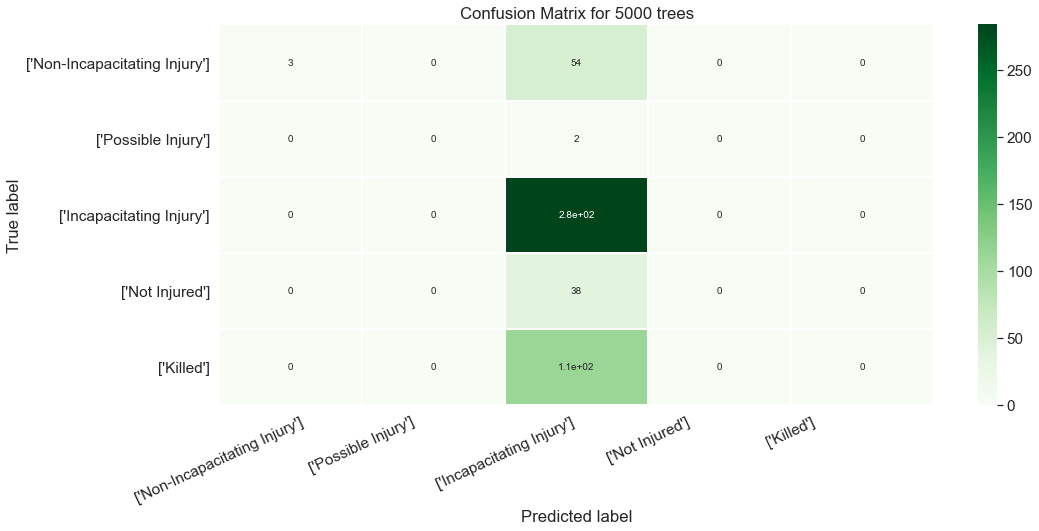

[[  3   0  54   0   0]
 [  0   0   2   0   0]
 [  0   0 284   0   0]
 [  0   0  38   0   0]
 [  0   0 112   0   0]]
                           precision    recall  f1-score   support

    Incapacitating Injury       1.00      0.05      0.10        57
                   Killed       0.00      0.00      0.00         2
Non-Incapacitating Injury       0.58      1.00      0.73       284
              Not Injured       0.00      0.00      0.00        38
          Possible Injury       0.00      0.00      0.00       112

                 accuracy                           0.58       493
                macro avg       0.32      0.21      0.17       493
             weighted avg       0.45      0.58      0.43       493



In [385]:
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
 # Get and reshape confusion matrix data,
#matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix = confusion_matrix(Z_test, zrf_predict1)
class_names = np.array(Z_test.drop_duplicates())
    # Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for 5000 trees')
plt.show()
print(confusion_matrix(Z_test, zrf_predict1))
print(classification_report(Z_test, zrf_predict1))

In [262]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Z_test, zrf_predict1))
print(classification_report(Z_test, zrf_predict1))

[[  3   0  47   0   0]
 [  0   0   3   0   0]
 [  0   0 299   0   0]
 [  0   0  28   0   0]
 [  0   0 113   0   0]]
                           precision    recall  f1-score   support

    Incapacitating Injury       1.00      0.06      0.11        50
                   Killed       0.00      0.00      0.00         3
Non-Incapacitating Injury       0.61      1.00      0.76       299
              Not Injured       0.00      0.00      0.00        28
          Possible Injury       0.00      0.00      0.00       113

                 accuracy                           0.61       493
                macro avg       0.32      0.21      0.17       493
             weighted avg       0.47      0.61      0.47       493



Text(0, 0.5, 'FEATURE NAMES')

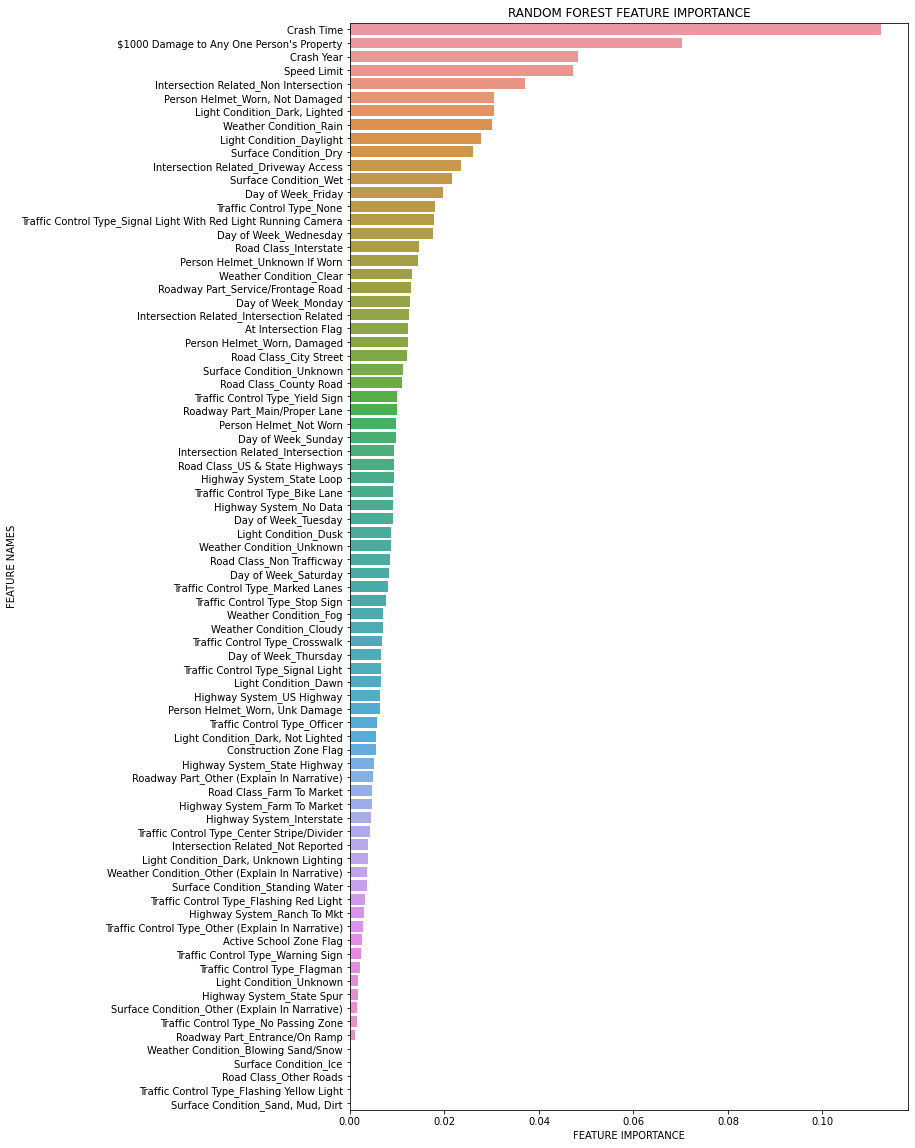

In [263]:
#Feature Importance
importances = rf_model1.feature_importances_

feature_importance = np.array(importances)
feature_names = np.array(X_train.columns)

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,20))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('RANDOM FOREST ' + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [379]:
rf_model2 = RandomForestClassifier(random_state=42,max_depth=4,n_estimators=10000)   
rf_model2.fit(X_train,Z_train)

RandomForestClassifier(max_depth=4, n_estimators=10000, random_state=42)

In [380]:
#Accuracy
zrf_predict2 = rf_model2.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(Z_test,zrf_predict2)

0.5821501014198783

In [382]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Z_test, zrf_predict2))
print(classification_report(Z_test, zrf_predict2))

[[  3   0  54   0   0]
 [  0   0   2   0   0]
 [  0   0 284   0   0]
 [  0   0  38   0   0]
 [  0   0 112   0   0]]
                           precision    recall  f1-score   support

    Incapacitating Injury       1.00      0.05      0.10        57
                   Killed       0.00      0.00      0.00         2
Non-Incapacitating Injury       0.58      1.00      0.73       284
              Not Injured       0.00      0.00      0.00        38
          Possible Injury       0.00      0.00      0.00       112

                 accuracy                           0.58       493
                macro avg       0.32      0.21      0.17       493
             weighted avg       0.45      0.58      0.43       493



# Neural Network

In [397]:

from sklearn.model_selection import train_test_split
x1_train, x1_test, z1_train, z1_test = train_test_split(x_logr, y_logr, test_size=0.20)


In [398]:
sm = SMOTE(random_state=139)
x1_res, z1_res = sm.fit_resample(x1_train, z1_train)

In [399]:
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp = MLPClassifier(solver='sgd',learning_rate_init= 0.01, max_iter=100,batch_size=64)

mlp.fit(x1_res, z1_res)

mlp.score(x1_test,z1_test)

0.008113590263691683

In [400]:
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp1 = MLPClassifier(solver='sgd',learning_rate_init= 0.001, max_iter=100,batch_size=64)

mlp1.fit(x1_train, z1_train)

mlp1.score(x1_test,z1_test)

0.6146044624746451

In [401]:
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp2 = MLPClassifier(solver='sgd',learning_rate_init= 0.01, max_iter=100,activation='logistic')

mlp2.fit(x1_train, z1_train)

mlp2.score(x1_test,z1_test)

0.6146044624746451

In [402]:
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp3 = MLPClassifier(solver='sgd',learning_rate_init= 0.01, max_iter=100,activation='tanh')

mlp3.fit(x1_train, z1_train)

mlp3.score(x1_test,z1_test)

0.6146044624746451

In [403]:
mlp_predict = mlp1.predict(x1_test)

In [404]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(z1_test, mlp_predict))
print(classification_report(z1_test, mlp_predict))

[[  0   0  46   0   0]
 [  0   0   4   0   0]
 [  0   0 303   0   0]
 [  0   0  32   0   0]
 [  0   0 108   0   0]]
                           precision    recall  f1-score   support

    Incapacitating Injury       0.00      0.00      0.00        46
                   Killed       0.00      0.00      0.00         4
Non-Incapacitating Injury       0.61      1.00      0.76       303
              Not Injured       0.00      0.00      0.00        32
          Possible Injury       0.00      0.00      0.00       108

                 accuracy                           0.61       493
                macro avg       0.12      0.20      0.15       493
             weighted avg       0.38      0.61      0.47       493

